In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
aapl = yf.Ticker("AAPL")
df0 = aapl.history(period = "100d")

goog = yf.Ticker("GOOG")
df1 = goog.history(period = "100d")

msft = yf.Ticker("MSFT")
df2 = msft.history(period = "100d")

spy = yf.Ticker("SPY")
df3 = spy.history(period = "100d")

amzn = yf.Ticker("AMZN")
df4 = amzn.history(period = "100d")

tsla = yf.Ticker("TSLA")
df5 = tsla.history(period = "100d")

meta = yf.Ticker("META")
df6 = meta.history(period = "100d")

nvda = yf.Ticker("NVDA")
df7 = nvda.history(period = "100d")

jpm = yf.Ticker("JPM")
df8 = jpm.history(period = "100d")

orcl = yf.Ticker("ORCL")
df9 = orcl.history(period = "100d")

In [ ]:
one = df0['Close'].to_list()
two = df1['Close'].to_list()
three = df2['Close'].to_list()
four = df3['Close'].to_list()
five = df4['Close'].to_list()
six = df5['Close'].to_list()
seven = df6['Close'].to_list()
eight = df7['Close'].to_list()
nine = df8['Close'].to_list()
ten = df9['Close'].to_list()

In [ ]:
from itertools import combinations

In [ ]:
all = [one, two, three, four, five, six, seven, eight, nine, ten]

In [ ]:
combo = list(combinations(all, 2))

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from matplotlib import rcParams
from cycler import cycler

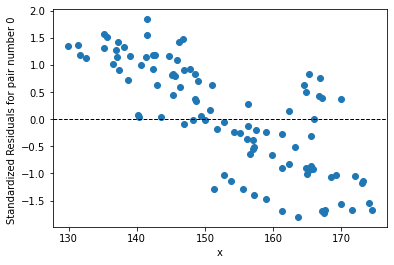

Pair number 0 has a non-stationary spread


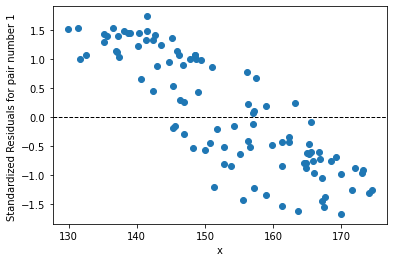

Pair number 1 has a non-stationary spread


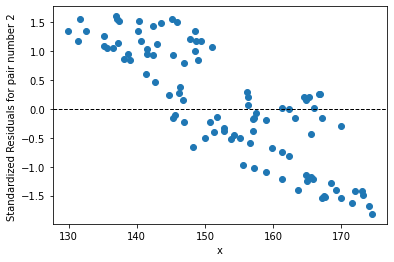

Pair number 2 has a non-stationary spread


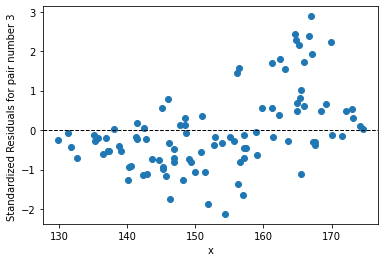

Pair number 3 has a stationary spread


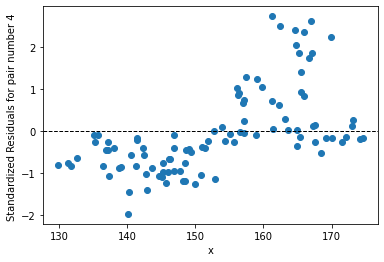

Pair number 4 has a stationary spread


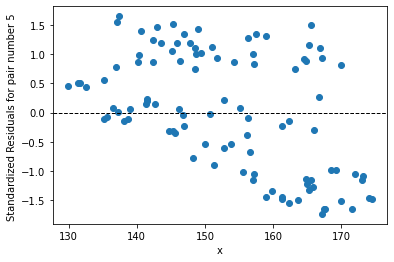

Pair number 5 has a non-stationary spread


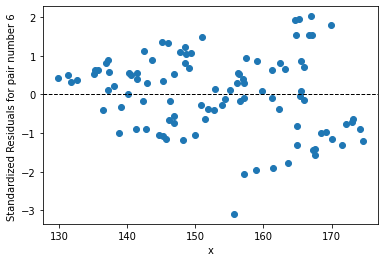

Pair number 6 has a non-stationary spread


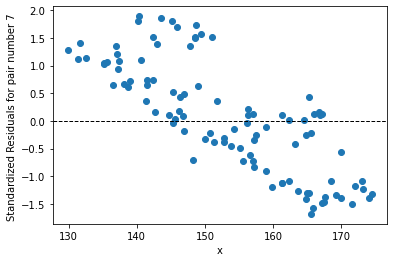

Pair number 7 has a non-stationary spread


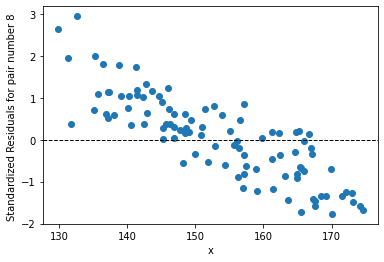

Pair number 8 has a non-stationary spread


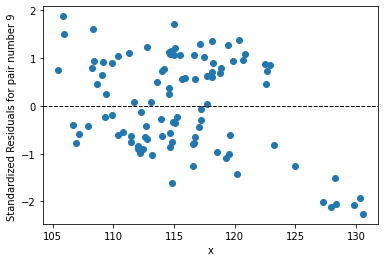

Pair number 9 has a stationary spread


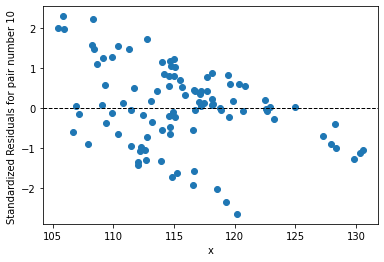

Pair number 10 has a non-stationary spread


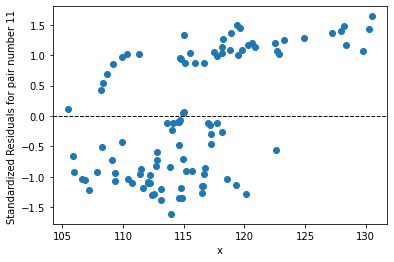

Pair number 11 has a non-stationary spread


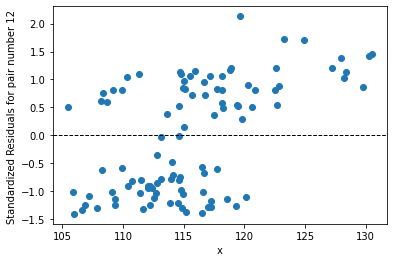

Pair number 12 has a non-stationary spread


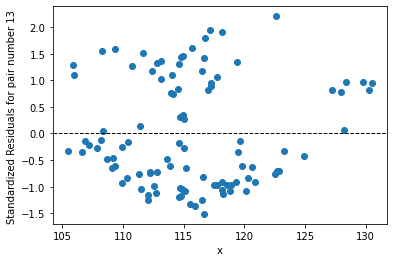

Pair number 13 has a non-stationary spread


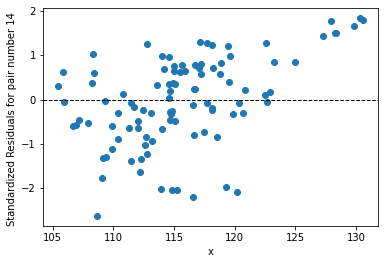

Pair number 14 has a non-stationary spread


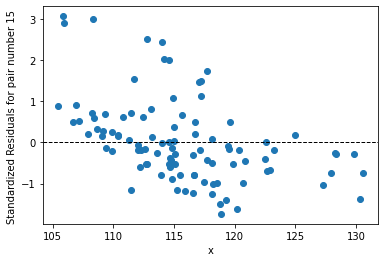

Pair number 15 has a non-stationary spread


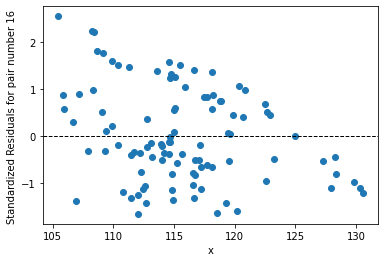

Pair number 16 has a non-stationary spread


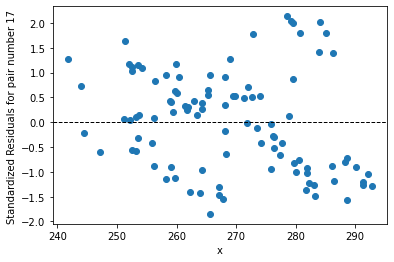

Pair number 17 has a non-stationary spread


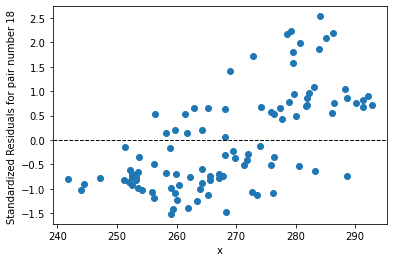

Pair number 18 has a non-stationary spread


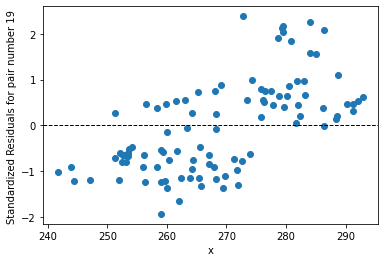

Pair number 19 has a non-stationary spread


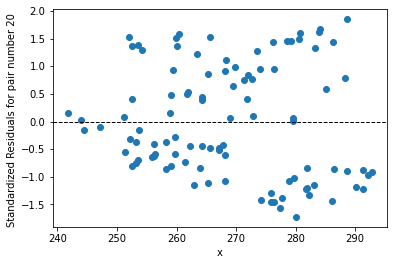

Pair number 20 has a non-stationary spread


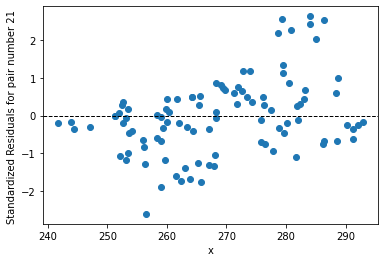

Pair number 21 has a non-stationary spread


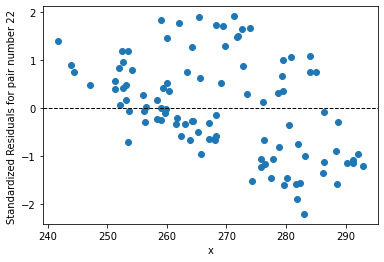

Pair number 22 has a non-stationary spread


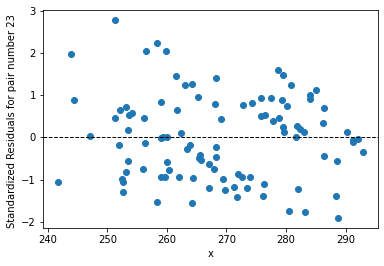

Pair number 23 has a non-stationary spread


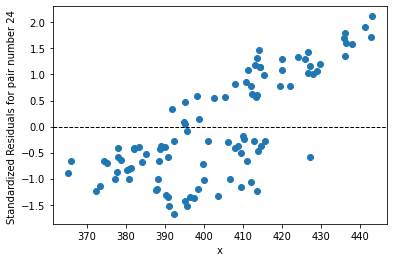

Pair number 24 has a non-stationary spread


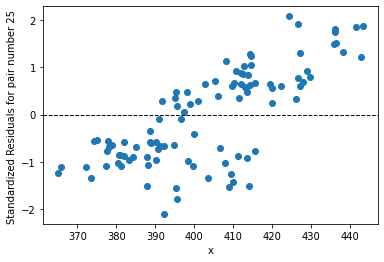

Pair number 25 has a non-stationary spread


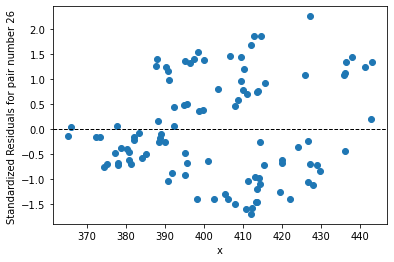

Pair number 26 has a non-stationary spread


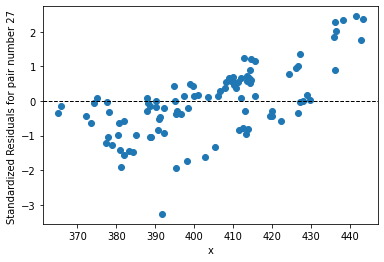

Pair number 27 has a non-stationary spread


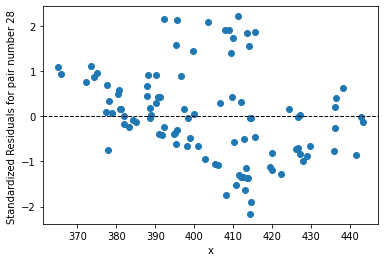

Pair number 28 has a non-stationary spread


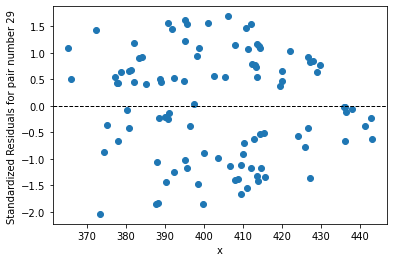

Pair number 29 has a non-stationary spread


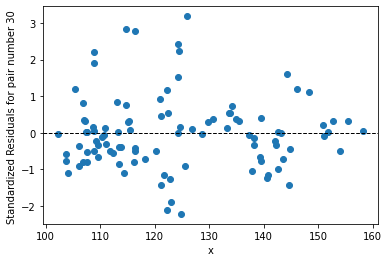

Pair number 30 has a stationary spread


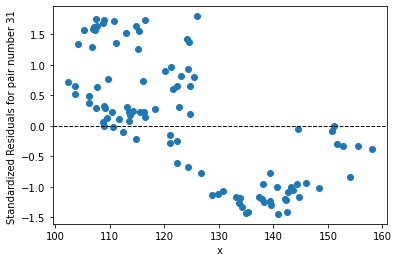

Pair number 31 has a non-stationary spread


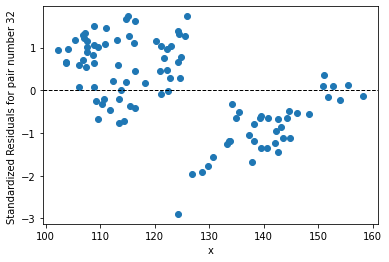

Pair number 32 has a non-stationary spread


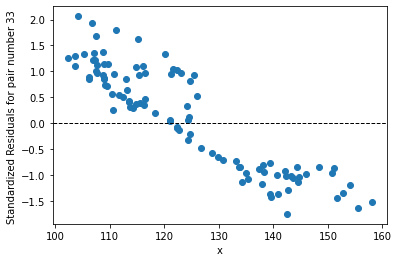

Pair number 33 has a non-stationary spread


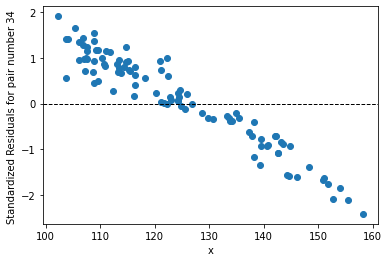

Pair number 34 has a non-stationary spread


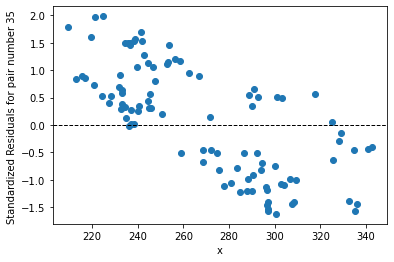

Pair number 35 has a non-stationary spread


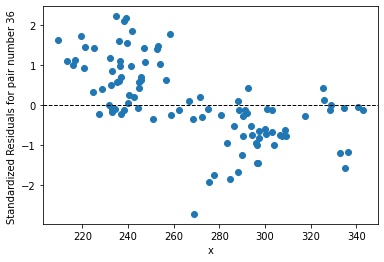

Pair number 36 has a non-stationary spread


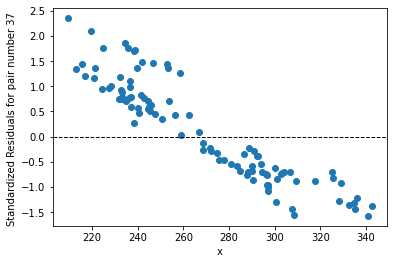

Pair number 37 has a non-stationary spread


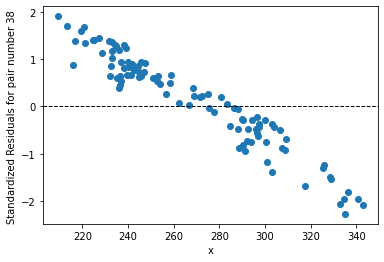

Pair number 38 has a non-stationary spread


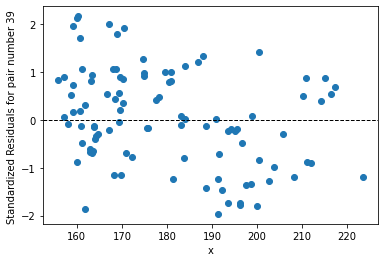

Pair number 39 has a non-stationary spread


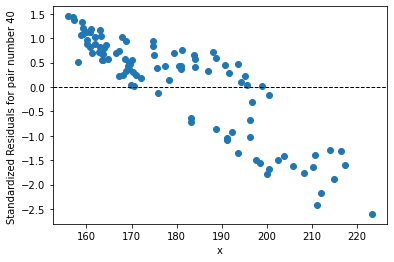

Pair number 40 has a non-stationary spread


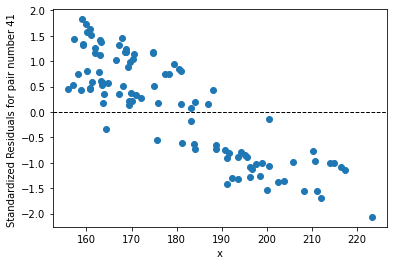

Pair number 41 has a non-stationary spread


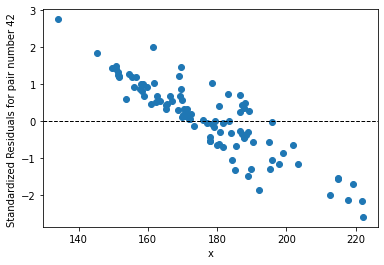

Pair number 42 has a non-stationary spread


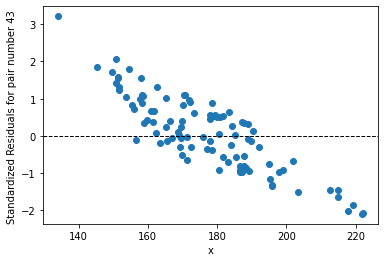

Pair number 43 has a non-stationary spread


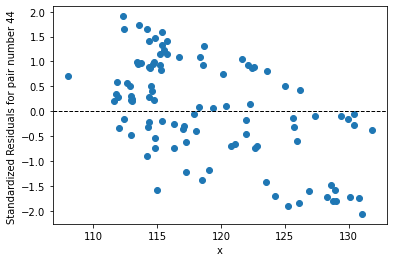

Pair number 44 has a non-stationary spread


In [ ]:
for i in range(len(combo)):

    # Fit the OLS model
    model = sm.OLS(combo[i][1], combo[i][0]).fit() 
    influence = model.get_influence()

    #Standardize the residuals
    standardized_residuals = influence.resid_studentized_internal
    
    plt.scatter(combo[i][0], standardized_residuals)
    plt.xlabel('x')
    plt.ylabel('Standardized Residuals for pair number {} '.format(i))
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.show()

    data = np.array(standardized_residuals)
    adfuller(data)

    # If p-value is less than 0.05, we reject the null hypothesis (i.e, its a stationary pair)
    if adfuller(standardized_residuals)[1] < 0.05:
      print('Pair number {} has a stationary spread'.format(i))
    else:
      print('Pair number {} has a non-stationary spread'.format(i))

In [ ]:
# 100 day data check
len(standardized_residuals)

100